In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
sample = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/Bathing_water_data/samples.csv')
sample

,EUBWID,label,sampleTime,intestinalEnterococciQualifier,intestinalEnterococciCount,escherichiaColiQualifier,escherichiaColiCount,discountable,discountableReason,discounted
0,ukc1101-06000,Seaton Carew North,2022-05-06T11:25:00,=,18,<,10,False,NaN,NaN
1,ukc1101-06000,Seaton Carew North,2022-05-19T12:05:00,=,45,<,10,False,NaN,NaN
2,ukc1101-06000,Seaton Carew North,2022-05-25T12:50:00,=,130,=,310,False,NaN,NaN
3,ukc1101-06000,Seaton Carew North,2022-05-31T12:15:00,<,10,<,10,False,NaN,NaN
4,ukc1101-06000,Seaton Carew North,2022-06-08T12:51:00,=,250,=,270,True,Short term pollution,True
...,...,...,...,...,...,...,...,...,...,...
7204,ukk4307-33900,Westward Ho!,2022-08-18T13:10:00,<,10,<,10,False,NaN,NaN
7205,ukk4307-33900,Westward Ho!,2022-08-25T13:30:00,<,10,<,10,False,NaN,NaN
7206,ukk4307-33900,Westward Ho!,2022-09-08T10:05:00,=,64,=,45,False,NaN,NaN
7207,ukk4307-33900,Westward Ho!,2022-09-13T13:15:00,<,10,<,10,False,NaN,NaN


In [9]:
cope = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/copernicus_data.csv')
cope

,time,lat,lon,SPM,TUR,CHL,site
0,2022-01-01,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
1,2022-01-02,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
2,2022-01-03,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
3,2022-01-04,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
4,2022-01-05,54.664352,-1.185360,NaN,NaN,NaN,Seaton Carew North
...,...,...,...,...,...,...,...
156945,2022-12-27,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156946,2022-12-28,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156947,2022-12-29,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!
156948,2022-12-30,51.043981,-4.235674,NaN,NaN,NaN,Westward Ho!


In [10]:
sample2= sample[["label","sampleTime","intestinalEnterococciCount","escherichiaColiCount"]]
sample2['sampleTime'] = sample2['sampleTime'].str[:10]
sample2 = sample2.rename(columns={'label': 'site', 'sampleTime': 'time'})
sample2

<ipython-input-10-6a9e12de10fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2['sampleTime'] = sample2['sampleTime'].str[:10]


,site,time,intestinalEnterococciCount,escherichiaColiCount
0,Seaton Carew North,2022-05-06,18,10
1,Seaton Carew North,2022-05-19,45,10
2,Seaton Carew North,2022-05-25,130,310
3,Seaton Carew North,2022-05-31,10,10
4,Seaton Carew North,2022-06-08,250,270
...,...,...,...,...
7204,Westward Ho!,2022-08-18,10,10
7205,Westward Ho!,2022-08-25,10,10
7206,Westward Ho!,2022-09-08,64,45
7207,Westward Ho!,2022-09-13,10,10


In [11]:
cope2 = cope[["site","time","SPM","TUR","CHL"]]
cope2

,site,time,SPM,TUR,CHL
0,Seaton Carew North,2022-01-01,NaN,NaN,NaN
1,Seaton Carew North,2022-01-02,NaN,NaN,NaN
2,Seaton Carew North,2022-01-03,NaN,NaN,NaN
3,Seaton Carew North,2022-01-04,NaN,NaN,NaN
4,Seaton Carew North,2022-01-05,NaN,NaN,NaN
...,...,...,...,...,...
156945,Westward Ho!,2022-12-27,NaN,NaN,NaN
156946,Westward Ho!,2022-12-28,NaN,NaN,NaN
156947,Westward Ho!,2022-12-29,NaN,NaN,NaN
156948,Westward Ho!,2022-12-30,NaN,NaN,NaN


In [12]:
df = pd.merge(sample2, cope2, on=['site','time'])
df = df.dropna()
df

,site,time,intestinalEnterococciCount,escherichiaColiCount,SPM,TUR,CHL
5,Seaton Carew North,2022-06-23,18,10,2.050142,3.484428,8.296334
25,Seaton Carew Centre,2022-06-23,10,10,1.057059,1.806370,3.428130
68,Redcar Coatham,2022-08-09,10,10,13.938836,21.946268,7.794440
88,Redcar Lifeboat Station,2022-08-09,10,10,2.007315,3.404534,4.191212
108,Redcar Granville,2022-08-09,27,36,19.887460,31.346073,14.231738
...,...,...,...,...,...,...,...
6572,Exmouth,2022-08-09,10,10,8.400484,13.929333,5.270146
7022,Bovisand,2022-08-07,10,27,11.660210,18.645416,6.813046
7087,Teignmouth Holcombe,2022-07-08,10,10,1.440232,2.456602,3.739557
7127,Shaldon,2022-07-08,10,10,0.587033,1.005328,1.128255


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

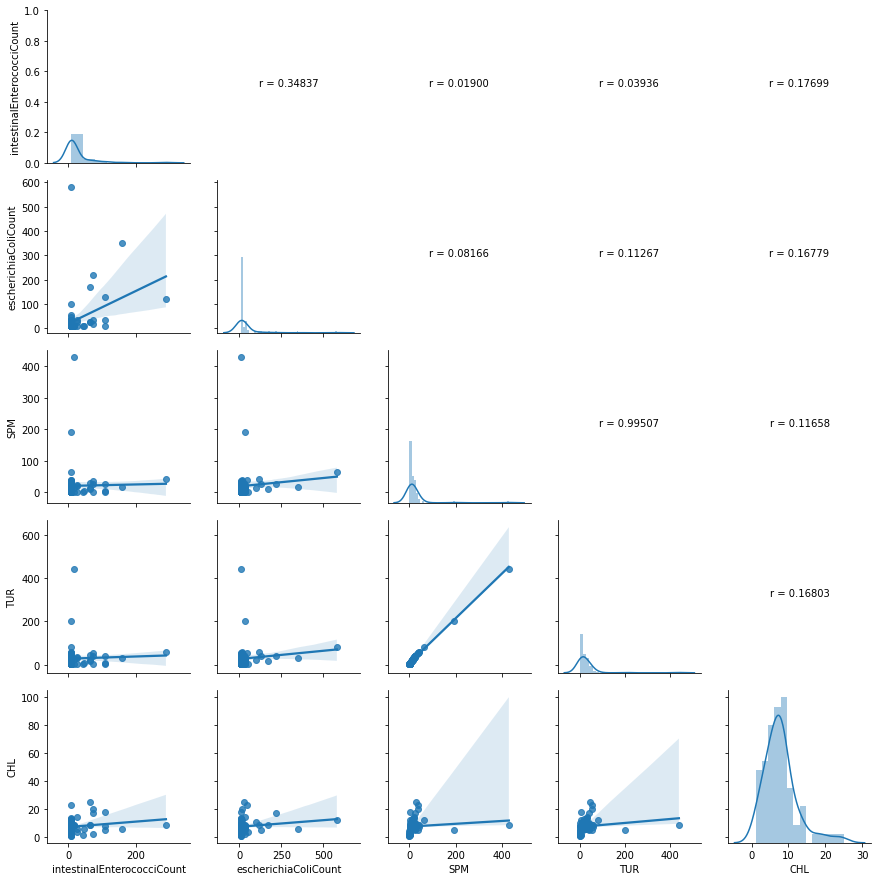

In [13]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.5f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

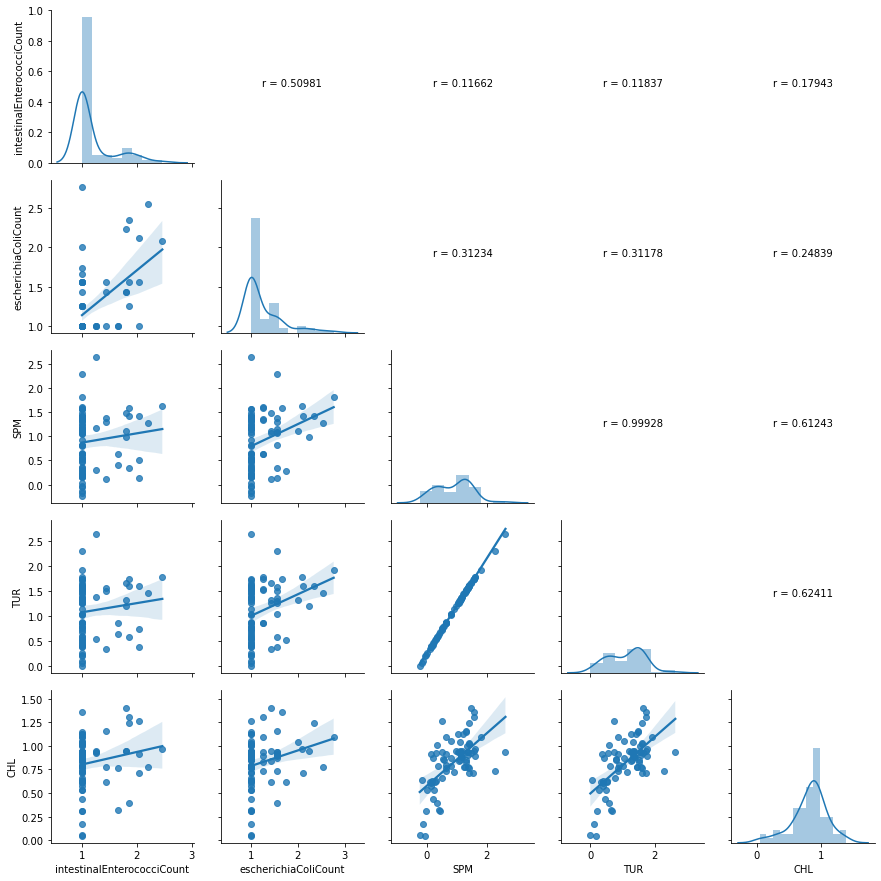

In [14]:
log_df = df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
l = sns.PairGrid(log_df)
l.map_diag(sns.distplot)
l.map_lower(sns.regplot)
l.map_upper(reg_coef)

In [16]:
riskforecasting = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/Bathing_water_data/pollution_risk_forecasting.csv')
riskforecasting

,EUBWID,label,predictedAt,publishedAt,expiresAt,warning,riskLevelLabel
0,ukc1101-06000,Seaton Carew North,2022-04-28T08:30:00,2022-04-28T08:40:18,2022-04-29T08:29:00,Pollution RIsk Forecasts will start soon,normal
1,ukc1101-06000,Seaton Carew North,2022-04-29T08:30:00,2022-04-29T08:40:12,2022-04-30T08:29:00,Pollution RIsk Forecasts will start soon,normal
2,ukc1101-06000,Seaton Carew North,2022-04-30T08:30:00,2022-05-03T15:56:23,2022-05-01T08:29:00,Pollution RIsk Forecasts will start soon,normal
3,ukc1101-06000,Seaton Carew North,2022-05-04T08:30:00,2022-05-04T16:12:30,2022-05-05T08:29:00,No warnings in place,normal
4,ukc1101-06000,Seaton Carew North,2022-05-05T08:30:00,2022-05-05T08:41:41,2022-05-06T08:29:00,No warnings in place,normal
...,...,...,...,...,...,...,...
63641,ukk4307-33900,Westward Ho!,2022-09-26T08:30:00,2022-09-26T08:41:14,2022-09-27T08:29:00,No pollution incidents reported,normal
63642,ukk4307-33900,Westward Ho!,2022-09-27T08:30:00,2022-09-27T08:40:24,2022-09-28T08:29:00,No pollution incidents reported,normal
63643,ukk4307-33900,Westward Ho!,2022-09-28T08:30:00,2022-09-28T08:40:49,2022-09-29T08:29:00,No pollution incidents reported,normal
63644,ukk4307-33900,Westward Ho!,2022-09-29T08:30:00,2022-09-29T08:40:39,2022-09-30T08:29:00,No pollution incidents reported,normal


In [17]:
riskforecasting.isnull().sum()

EUBWID            0
label             0
predictedAt       0
publishedAt       0
expiresAt         0
warning           0
riskLevelLabel    0
dtype: int64

In [18]:
riskforecasting['riskLevelLabel'].value_counts()

normal       62302
increased     1344
Name: riskLevelLabel, dtype: int64

In [19]:
riskforecasting['riskLevelLabel'] = [1 if i == 'increased' else 0 for i in riskforecasting['riskLevelLabel']]

In [20]:
riskforecasting['warning'].value_counts()

No pollution incidents reported                       35853
No warnings in place                                  24855
Pollution RIsk Forecasts will start soon               1251
Advice against bathing: pollution risk warning         1088
Bathing water closed                                    302
Risk of reduced water quality due to sewage             114
Advice against bathing: pollution incident              105
Pollution incident ended, no forecast available          41
Risk of reduced water quality due to harmful algae       17
Risk of reduced water quality due to oil or fuel         10
Risk of reduced water quality due to animal waste         7
Risk of reduced water quality due to other                3
Name: warning, dtype: int64

In [21]:
one_hot = pd.get_dummies(riskforecasting['warning'])
riskforecasting = riskforecasting.drop('warning', axis=1)
riskforecasting = riskforecasting.join(one_hot)
riskforecasting

,EUBWID,label,predictedAt,publishedAt,expiresAt,riskLevelLabel,Advice against bathing: pollution incident,Advice against bathing: pollution risk warning,Bathing water closed,No pollution incidents reported,No warnings in place,Pollution RIsk Forecasts will start soon,"Pollution incident ended, no forecast available",Risk of reduced water quality due to animal waste,Risk of reduced water quality due to harmful algae,Risk of reduced water quality due to oil or fuel,Risk of reduced water quality due to other,Risk of reduced water quality due to sewage
0,ukc1101-06000,Seaton Carew North,2022-04-28T08:30:00,2022-04-28T08:40:18,2022-04-29T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0
1,ukc1101-06000,Seaton Carew North,2022-04-29T08:30:00,2022-04-29T08:40:12,2022-04-30T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0
2,ukc1101-06000,Seaton Carew North,2022-04-30T08:30:00,2022-05-03T15:56:23,2022-05-01T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0
3,ukc1101-06000,Seaton Carew North,2022-05-04T08:30:00,2022-05-04T16:12:30,2022-05-05T08:29:00,0,0,0,0,0,1,0,0,0,0,0,0,0
4,ukc1101-06000,Seaton Carew North,2022-05-05T08:30:00,2022-05-05T08:41:41,2022-05-06T08:29:00,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63641,ukk4307-33900,Westward Ho!,2022-09-26T08:30:00,2022-09-26T08:41:14,2022-09-27T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0
63642,ukk4307-33900,Westward Ho!,2022-09-27T08:30:00,2022-09-27T08:40:24,2022-09-28T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0
63643,ukk4307-33900,Westward Ho!,2022-09-28T08:30:00,2022-09-28T08:40:49,2022-09-29T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0
63644,ukk4307-33900,Westward Ho!,2022-09-29T08:30:00,2022-09-29T08:40:39,2022-09-30T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
riskforecasting['predictedAt'] = pd.to_datetime(riskforecasting.predictedAt)
riskforecasting['time'] = riskforecasting['predictedAt'].dt.strftime('%Y-%m-%d')
riskforecasting['site'] = riskforecasting['label']
riskforecasting = riskforecasting.drop('label', axis=1)
riskforecasting

,EUBWID,predictedAt,publishedAt,expiresAt,riskLevelLabel,Advice against bathing: pollution incident,Advice against bathing: pollution risk warning,Bathing water closed,No pollution incidents reported,No warnings in place,Pollution RIsk Forecasts will start soon,"Pollution incident ended, no forecast available",Risk of reduced water quality due to animal waste,Risk of reduced water quality due to harmful algae,Risk of reduced water quality due to oil or fuel,Risk of reduced water quality due to other,Risk of reduced water quality due to sewage,time,site
0,ukc1101-06000,2022-04-28 08:30:00,2022-04-28T08:40:18,2022-04-29T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-04-28,Seaton Carew North
1,ukc1101-06000,2022-04-29 08:30:00,2022-04-29T08:40:12,2022-04-30T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-04-29,Seaton Carew North
2,ukc1101-06000,2022-04-30 08:30:00,2022-05-03T15:56:23,2022-05-01T08:29:00,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-04-30,Seaton Carew North
3,ukc1101-06000,2022-05-04 08:30:00,2022-05-04T16:12:30,2022-05-05T08:29:00,0,0,0,0,0,1,0,0,0,0,0,0,0,2022-05-04,Seaton Carew North
4,ukc1101-06000,2022-05-05 08:30:00,2022-05-05T08:41:41,2022-05-06T08:29:00,0,0,0,0,0,1,0,0,0,0,0,0,0,2022-05-05,Seaton Carew North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63641,ukk4307-33900,2022-09-26 08:30:00,2022-09-26T08:41:14,2022-09-27T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0,2022-09-26,Westward Ho!
63642,ukk4307-33900,2022-09-27 08:30:00,2022-09-27T08:40:24,2022-09-28T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0,2022-09-27,Westward Ho!
63643,ukk4307-33900,2022-09-28 08:30:00,2022-09-28T08:40:49,2022-09-29T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0,2022-09-28,Westward Ho!
63644,ukk4307-33900,2022-09-29 08:30:00,2022-09-29T08:40:39,2022-09-30T08:29:00,0,0,0,0,1,0,0,0,0,0,0,0,0,2022-09-29,Westward Ho!


In [23]:
df2 = pd.merge(riskforecasting, cope2, on=['site','time'])
df2 = df2.dropna()
df2

,EUBWID,predictedAt,publishedAt,expiresAt,riskLevelLabel,Advice against bathing: pollution incident,Advice against bathing: pollution risk warning,Bathing water closed,No pollution incidents reported,No warnings in place,...,Risk of reduced water quality due to animal waste,Risk of reduced water quality due to harmful algae,Risk of reduced water quality due to oil or fuel,Risk of reduced water quality due to other,Risk of reduced water quality due to sewage,time,site,SPM,TUR,CHL
1,ukc1101-06000,2022-04-29 08:30:00,2022-04-29T08:40:12,2022-04-30T08:29:00,0,0,0,0,0,0,...,0,0,0,0,0,2022-04-29,Seaton Carew North,41.126600,60.180290,11.448505
50,ukc1101-06000,2022-06-20 08:30:00,2022-06-20T08:40:16,2022-06-21T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-06-20,Seaton Carew North,22.679785,34.822575,13.717284
53,ukc1101-06000,2022-06-23 08:30:00,2022-06-23T08:41:36,2022-06-24T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-06-23,Seaton Carew North,2.050142,3.484428,8.296334
70,ukc1101-06000,2022-07-10 08:30:00,2022-07-10T08:40:52,2022-07-11T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-07-10,Seaton Carew North,5.207922,8.725295,5.510527
100,ukc1101-06000,2022-08-09 08:30:00,2022-08-09T11:03:17,2022-08-10T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-08-09,Seaton Carew North,7.116791,11.771763,5.696101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63104,ukk4306-22900,2022-07-03 08:30:00,2022-07-03T08:40:16,2022-07-04T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-07-03,Shaldon,0.902155,1.542960,1.908623
63109,ukk4306-22900,2022-07-08 08:30:00,2022-07-08T08:42:37,2022-07-09T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-07-08,Shaldon,0.587033,1.005328,1.128255
63139,ukk4306-22900,2022-08-07 08:30:00,2022-08-07T08:41:47,2022-08-08T08:29:00,0,0,0,0,0,1,...,0,0,0,0,0,2022-08-07,Shaldon,0.836071,1.430170,3.891465
63379,ukk4307-33800,2022-06-06 08:30:00,2022-06-06T08:40:41,2022-06-07T08:29:00,0,0,0,0,1,0,...,0,0,0,0,0,2022-06-06,Hartland Quay,0.676724,1.158486,4.287363


SPM


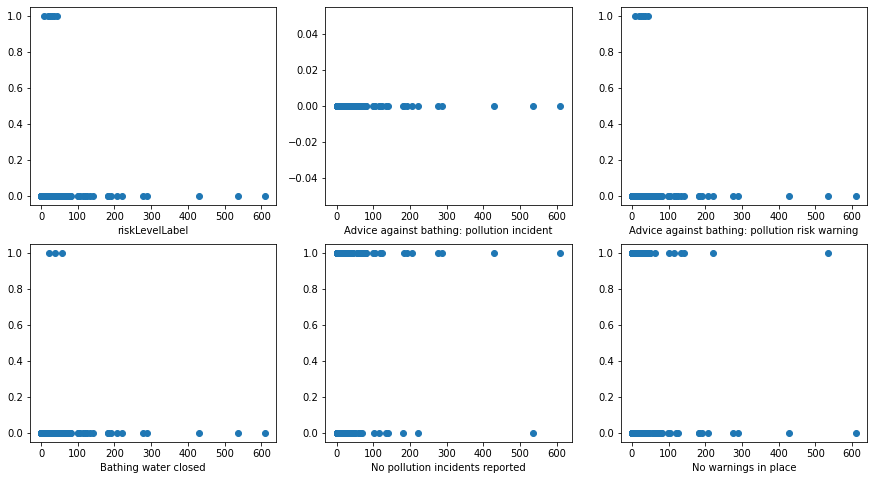

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.scatter(df2.iloc[:,19], df2.iloc[:,4])
ax2.scatter(df2.iloc[:,19], df2.iloc[:,5])
ax3.scatter(df2.iloc[:,19], df2.iloc[:,6])
ax4.scatter(df2.iloc[:,19], df2.iloc[:,7])
ax5.scatter(df2.iloc[:,19], df2.iloc[:,8])
ax6.scatter(df2.iloc[:,19], df2.iloc[:,9])

ax1.set_xlabel(df2.columns[4])
ax2.set_xlabel(df2.columns[5])
ax3.set_xlabel(df2.columns[6])
ax4.set_xlabel(df2.columns[7])
ax5.set_xlabel(df2.columns[8])
ax6.set_xlabel(df2.columns[9])

print('SPM')

TUM


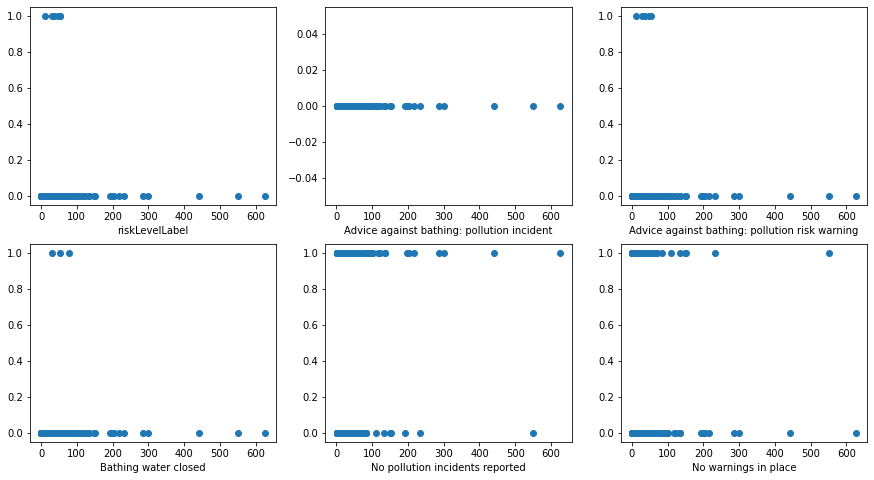

In [25]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.scatter(df2.iloc[:,20], df2.iloc[:,4])
ax2.scatter(df2.iloc[:,20], df2.iloc[:,5])
ax3.scatter(df2.iloc[:,20], df2.iloc[:,6])
ax4.scatter(df2.iloc[:,20], df2.iloc[:,7])
ax5.scatter(df2.iloc[:,20], df2.iloc[:,8])
ax6.scatter(df2.iloc[:,20], df2.iloc[:,9])

ax1.set_xlabel(df2.columns[4])
ax2.set_xlabel(df2.columns[5])
ax3.set_xlabel(df2.columns[6])
ax4.set_xlabel(df2.columns[7])
ax5.set_xlabel(df2.columns[8])
ax6.set_xlabel(df2.columns[9])

print('TUM')

CHL


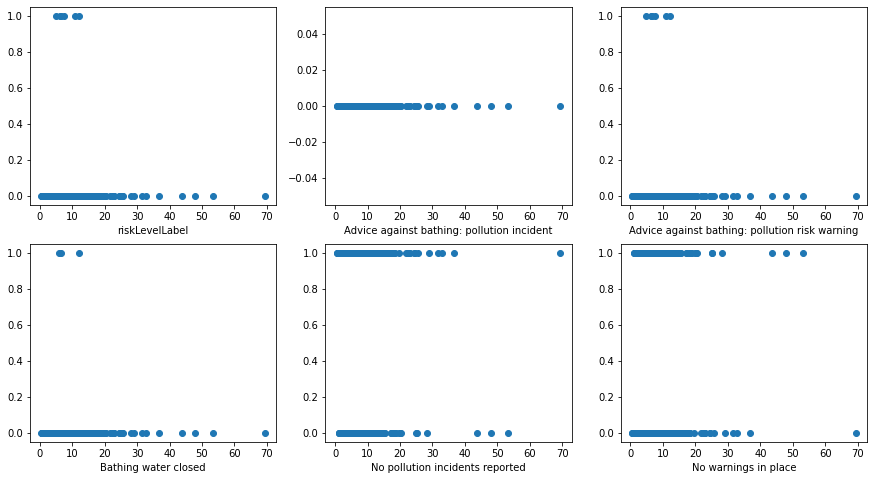

In [26]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.scatter(df2.iloc[:,21], df2.iloc[:,4])
ax2.scatter(df2.iloc[:,21], df2.iloc[:,5])
ax3.scatter(df2.iloc[:,21], df2.iloc[:,6])
ax4.scatter(df2.iloc[:,21], df2.iloc[:,7])
ax5.scatter(df2.iloc[:,21], df2.iloc[:,8])
ax6.scatter(df2.iloc[:,21], df2.iloc[:,9])

ax1.set_xlabel(df2.columns[4])
ax2.set_xlabel(df2.columns[5])
ax3.set_xlabel(df2.columns[6])
ax4.set_xlabel(df2.columns[7])
ax5.set_xlabel(df2.columns[8])
ax6.set_xlabel(df2.columns[9])

print('CHL')